# Climate applications for ...


## Load

In [1]:
%matplotlib widget
import time
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

from aeromaps.core.process import create_process
from aeromaps.core.models import (
    models_simple,
    models_complex,
    models_complex_improvedgwpstar,
    models_complex_fair,
)
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

## Climate models

### Simple GWP*

In [2]:
# Create process
process1 = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

In [3]:
# Change end year
process1.parameters.end_year = 2100
process1.setup()

In [4]:
# Air traffic evolution

## Growth rate by category [%]
process1.parameters.cagr_passenger_short_range_reference_periods = []
process1.parameters.cagr_passenger_short_range_reference_periods_values = [2.0]
process1.parameters.cagr_passenger_medium_range_reference_periods = []
process1.parameters.cagr_passenger_medium_range_reference_periods_values = [2.0]
process1.parameters.cagr_passenger_long_range_reference_periods = []
process1.parameters.cagr_passenger_long_range_reference_periods_values = [2.0]
process1.parameters.cagr_freight_reference_periods = []
process1.parameters.cagr_freight_reference_periods_values = [2.0]

# Aircraft fleet

## Initialization
fleet1 = process1.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet1.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet1.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet1.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)

## Fleet renewal
fleet1.categories["Short Range"].parameters.life = 20
fleet1.categories["Medium Range"].parameters.life = 20
fleet1.categories["Long Range"].parameters.life = 20

# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor for the final year [%]
process1.parameters.load_factor_end_year = 89

# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function for reducing energy consumption
process1.parameters.operations_final_gain = 8.0  # [%]
process1.parameters.operations_start_year = 2025
process1.parameters.operations_duration = 25.0

## Values for setting the logistic function for reducing energy consumption
process1.parameters.operations_contrails_final_gain = 100  # [%]
process1.parameters.operations_contrails_start_year = 2050
process1.parameters.operations_contrails_duration = 5.0
process1.parameters.operations_contrails_final_overconsumption = 0.0

# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process1.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process1.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0, 0.0]
process1.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process1.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0, 100.0]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process1.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050, 2070]
process1.parameters.electricity_emission_factor_reference_years_values = [
    429.0,
    180.0,
    75.0,
    30.0,
    0.0,
]

## Share of hydrogen production pathways [%]
process1.parameters.hydrogen_electrolysis_share_reference_years = []
process1.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process1.parameters.hydrogen_gas_share_reference_years = []
process1.parameters.hydrogen_gas_share_reference_years_values = [0]

### Improved GWP* with median TCRE

In [5]:
# Create process
process2 = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

In [6]:
# Change end year
process2.parameters.end_year = 2100
process2.setup()

In [7]:
# Air traffic evolution

## Growth rate by category [%]
process2.parameters.cagr_passenger_short_range_reference_periods = []
process2.parameters.cagr_passenger_short_range_reference_periods_values = [2.0]
process2.parameters.cagr_passenger_medium_range_reference_periods = []
process2.parameters.cagr_passenger_medium_range_reference_periods_values = [2.0]
process2.parameters.cagr_passenger_long_range_reference_periods = []
process2.parameters.cagr_passenger_long_range_reference_periods_values = [2.0]
process2.parameters.cagr_freight_reference_periods = []
process2.parameters.cagr_freight_reference_periods_values = [2.0]

# Aircraft fleet

## Initialization
fleet2 = process2.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet2.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet2.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet2.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)

## Fleet renewal
fleet2.categories["Short Range"].parameters.life = 20
fleet2.categories["Medium Range"].parameters.life = 20
fleet2.categories["Long Range"].parameters.life = 20

# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor for the final year [%]
process2.parameters.load_factor_end_year = 89

# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function for reducing energy consumption
process2.parameters.operations_final_gain = 8.0  # [%]
process2.parameters.operations_start_year = 2025
process2.parameters.operations_duration = 25.0

## Values for setting the logistic function for reducing energy consumption
process2.parameters.operations_contrails_final_gain = 100  # [%]
process2.parameters.operations_contrails_start_year = 2050
process2.parameters.operations_contrails_duration = 5.0
process2.parameters.operations_contrails_final_overconsumption = 0.0

# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process2.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process2.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0, 0.0]
process2.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process2.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0, 100.0]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process2.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050, 2070]
process2.parameters.electricity_emission_factor_reference_years_values = [
    429.0,
    180.0,
    75.0,
    30.0,
    0.0,
]

## Share of hydrogen production pathways [%]
process2.parameters.hydrogen_electrolysis_share_reference_years = []
process2.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process2.parameters.hydrogen_gas_share_reference_years = []
process2.parameters.hydrogen_gas_share_reference_years_values = [0]

In [8]:
# Climate models

process2.parameters.tcre_coefficient = 0.00045
process2.parameters.contrails_gwpstar_variation_duration = 1.0
process2.parameters.contrails_gwpstar_alpha_coefficient = 0.0
process2.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = 1.0
process2.parameters.nox_short_term_o3_increase_gwpstar_alpha_coefficient = 0.0
process2.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process2.parameters.nox_long_term_o3_decrease_gwpstar_alpha_coefficient = 0.0
process2.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process2.parameters.nox_ch4_decrease_gwpstar_alpha_coefficient = 0.25
process2.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process2.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_alpha_coefficient = 0.0
process2.parameters.soot_gwpstar_variation_duration = 1.0
process2.parameters.soot_gwpstar_alpha_coefficient = 0.0
process2.parameters.h2o_gwpstar_variation_duration = 1.0
process2.parameters.h2o_gwpstar_alpha_coefficient = 0.0
process2.parameters.sulfur_gwpstar_variation_duration = 1.0
process2.parameters.sulfur_gwpstar_alpha_coefficient = 0.0

### Improved GWP* with FaIR

In [9]:
# Create process
process3 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

In [10]:
# Change end year
process3.parameters.end_year = 2100
process3.setup()

In [11]:
# Air traffic evolution

## Growth rate by category [%]
process3.parameters.cagr_passenger_short_range_reference_periods = []
process3.parameters.cagr_passenger_short_range_reference_periods_values = [2.0]
process3.parameters.cagr_passenger_medium_range_reference_periods = []
process3.parameters.cagr_passenger_medium_range_reference_periods_values = [2.0]
process3.parameters.cagr_passenger_long_range_reference_periods = []
process3.parameters.cagr_passenger_long_range_reference_periods_values = [2.0]
process3.parameters.cagr_freight_reference_periods = []
process3.parameters.cagr_freight_reference_periods_values = [2.0]

# Aircraft fleet

## Initialization
fleet3 = process3.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet3.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet3.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet3.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)

## Fleet renewal
fleet3.categories["Short Range"].parameters.life = 20
fleet3.categories["Medium Range"].parameters.life = 20
fleet3.categories["Long Range"].parameters.life = 20

# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor for the final year [%]
process3.parameters.load_factor_end_year = 89

# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function for reducing energy consumption
process3.parameters.operations_final_gain = 8.0  # [%]
process3.parameters.operations_start_year = 2025
process3.parameters.operations_duration = 25.0

## Values for setting the logistic function for reducing energy consumption
process3.parameters.operations_contrails_final_gain = 100  # [%]
process3.parameters.operations_contrails_start_year = 2050
process3.parameters.operations_contrails_duration = 5.0
process3.parameters.operations_contrails_final_overconsumption = 0.0

# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process3.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process3.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0, 0.0]
process3.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process3.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0, 100.0]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process3.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050, 2070]
process3.parameters.electricity_emission_factor_reference_years_values = [
    429.0,
    180.0,
    75.0,
    30.0,
    0.0,
]

## Share of hydrogen production pathways [%]
process3.parameters.hydrogen_electrolysis_share_reference_years = []
process3.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process3.parameters.hydrogen_gas_share_reference_years = []
process3.parameters.hydrogen_gas_share_reference_years_values = [0]

process3.parameters.tcre_coefficient = 0.00045

### Climate parameters

In [12]:
# Climate sensitivity
contrails_choice = "Lee"
nox_choice = "Lee"
# Contrails
## Lee et al.
if contrails_choice == "Lee":
    process3.parameters.erf_coefficient_contrails = 1.058e-09
## Digby et al.
elif contrails_choice == "Digby":
    process3.parameters.erf_coefficient_contrails = 1.058e-09 * 8 / 57.4
# NOx
## Lee et al.
if nox_choice == "Lee":
    process3.parameters.erf_coefficient_nox_short_term_o3_increase = 34.4 * 1.35 * 0.88
    process3.parameters.erf_coefficient_nox_long_term_o3_decrease = -9.3 * 1.35 * 0.88 * 0.79
    process3.parameters.erf_coefficient_nox_ch4_decrease = -18.7 * 1.35 * 0.88 * 0.79
    process3.parameters.erf_coefficient_nox_stratospheric_water_vapor_decrease = (
        -2.8 * 1.35 * 0.88 * 0.79
    )
## Grewe et al.
elif nox_choice == "Grewe":
    process3.parameters.erf_coefficient_nox_short_term_o3_increase = 59.0
    process3.parameters.erf_coefficient_nox_long_term_o3_decrease = -4.1
    process3.parameters.erf_coefficient_nox_ch4_decrease = -12.3
    process3.parameters.erf_coefficient_nox_stratospheric_water_vapor_decrease = -1.5

## Compute

In [13]:
t1 = time.time()
process1.compute()
process2.compute()
process3.compute()
t2 = time.time()
print("Computation time:", np.round(t2 - t1, 1), "s")

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electricity_emission_factor - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, th

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Computation time: 10.1 s


## Results

## Plots

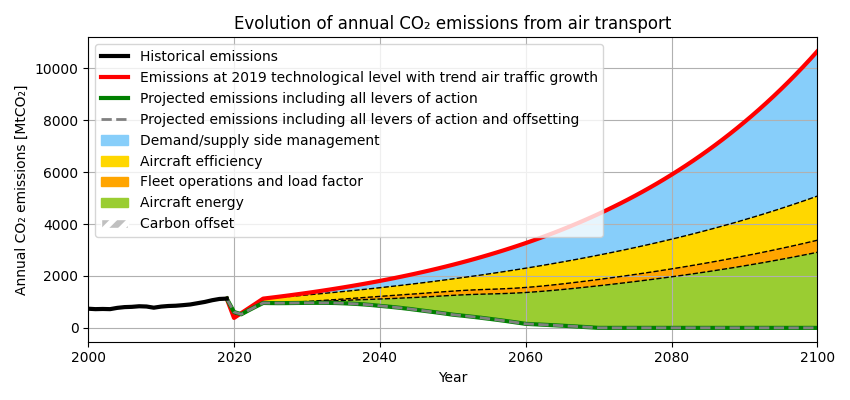

In [14]:
process3.plot("air_transport_co2_emissions")

In [33]:
data_temperature_aeromaps_simple_gwpstar = process1.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_simple_gwpstar_co2 = process1.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_simple_gwpstar_non_co2 = process1.data["climate_outputs"][
    "temperature_increase_from_non_co2_from_aviation"
]

data_temperature_aeromaps_gwpstar = process2.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_gwpstar_co2 = process2.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_gwpstar_non_co2 = process2.data["climate_outputs"][
    "temperature_increase_from_non_co2_from_aviation"
]

data_temperature_aeromaps_fair = process3.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_fair_co2 = process3.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_fair_non_co2 = process3.data["climate_outputs"][
    "temperature_increase_from_non_co2_from_aviation"
]

In [34]:
reference_temperature_data_df = read_csv("data/reference_temperature_change.csv", delimiter=";")
reference_temperature_data = reference_temperature_data_df.values
data_years = reference_temperature_data[:, 0]
data_temperature_grewe_curtech = reference_temperature_data[:, 1]
data_temperature_grewe_ecats = reference_temperature_data[:, 2]
data_temperature_klower = reference_temperature_data[:, 3]
data_temperature_klower_co2 = reference_temperature_data[:, 4]

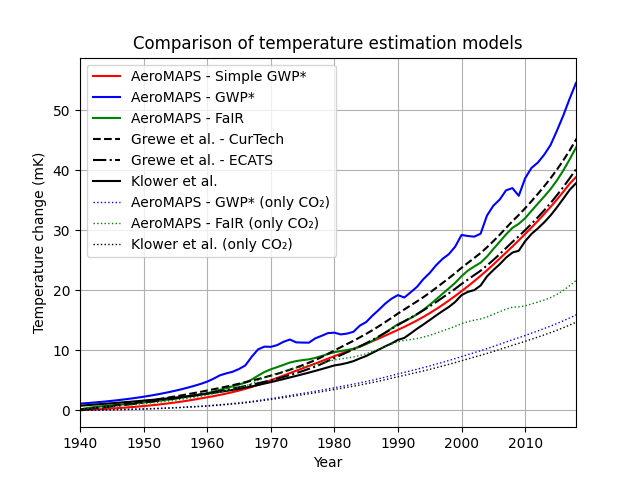

In [35]:
fig, ax = plt.subplots()
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_simple_gwpstar[0:80],
    color="red",
    label="AeroMAPS - Simple GWP*",
    linestyle="-",
)
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar[0:80],
    color="blue",
    label="AeroMAPS - GWP*",
    linestyle="-",
)
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_fair[0:80],
    color="green",
    label="AeroMAPS - FaIR",
    linestyle="-",
)
ax.plot(
    data_years,
    data_temperature_grewe_curtech,
    color="black",
    label="Grewe et al. - CurTech",
    linestyle="--",
)
ax.plot(
    data_years,
    data_temperature_grewe_ecats,
    color="black",
    label="Grewe et al. - ECATS",
    linestyle="-.",
)
ax.plot(data_years, data_temperature_klower, color="black", label="Klower et al.", linestyle="-")
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80],
    color="blue",
    label="AeroMAPS - GWP* (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_fair_co2[0:80],
    color="green",
    label="AeroMAPS - FaIR (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.plot(
    data_years,
    data_temperature_klower_co2,
    color="black",
    label="Klower et al. (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Comparison of temperature estimation models",
)
ax.grid()
plt.xlim(1940, 2018)
plt.legend()
plt.show()

In [49]:
data_temperature_aeromaps_fair = process3.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_fair_co2 = process3.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_fair_contrails = process3.data["climate_outputs"][
    "temperature_increase_from_contrails_from_aviation"
]
data_temperature_aeromaps_fair_nox_short_term_o3_increase = process3.data["climate_outputs"][
    "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
]
data_temperature_aeromaps_fair_h2o = process3.data["climate_outputs"][
    "temperature_increase_from_h2o_from_aviation"
]
data_temperature_aeromaps_fair_nox_neg = process3.data["climate_outputs"][
    "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
] + process3.data["climate_outputs"][
    "temperature_increase_from_nox_ch4_decrease_from_aviation"
] + process3.data["climate_outputs"][
    "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
]
data_temperature_aeromaps_fair_aerosols = process3.data["climate_outputs"][
    "temperature_increase_from_soot_from_aviation"
] + process3.data["climate_outputs"][
    "temperature_increase_from_sulfur_from_aviation"
]

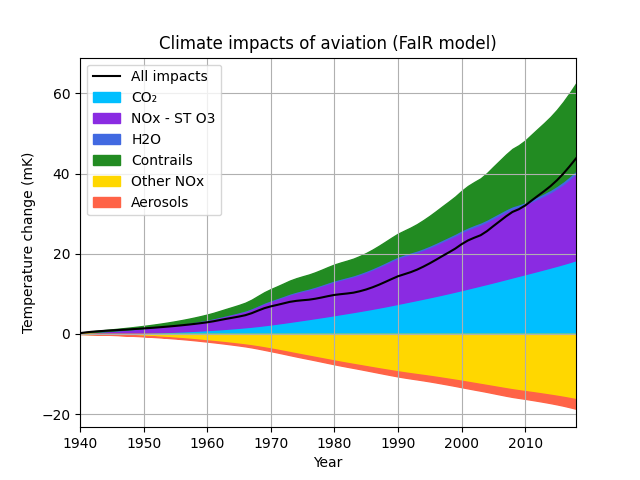

In [52]:
fig, ax = plt.subplots()
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_fair[0:80],
    color="black",
    label="All impacts",
    linestyle="-",
)

ax.fill_between(data_years, np.zeros(80), 1000 * data_temperature_aeromaps_fair_co2[0:80], color='deepskyblue', label='CO₂')

ax.fill_between(data_years, 1000 * data_temperature_aeromaps_fair_co2[0:80], 1000 * data_temperature_aeromaps_fair_co2[0:80] + 1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80], color='blueviolet', label='NOx - ST O3')

ax.fill_between(data_years, 1000 * data_temperature_aeromaps_fair_co2[0:80] + 1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80], 1000 * data_temperature_aeromaps_fair_co2[0:80] + 
                1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80] + 1000 *data_temperature_aeromaps_fair_h2o[0:80], color='royalblue', label='H2O')

ax.fill_between(data_years, 1000 * data_temperature_aeromaps_fair_co2[0:80] + 1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80] + 1000 *data_temperature_aeromaps_fair_h2o[0:80], 1000 * data_temperature_aeromaps_fair_co2[0:80] + 1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80] + 1000 *data_temperature_aeromaps_fair_h2o[0:80] + 1000 *data_temperature_aeromaps_fair_contrails[0:80], color='forestgreen', label='Contrails')

ax.fill_between(data_years, np.zeros(80), 1000 * data_temperature_aeromaps_fair_nox_neg[0:80], color='gold', label='Other NOx')

ax.fill_between(data_years, 1000 * data_temperature_aeromaps_fair_nox_neg[0:80], 1000 * data_temperature_aeromaps_fair_nox_neg[0:80] + 1000 * data_temperature_aeromaps_fair_aerosols[0:80], color='tomato', label='Aerosols')

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Climate impacts of aviation (FaIR model)",
)
ax.grid()
plt.xlim(1940, 2018)
plt.legend()
plt.show()

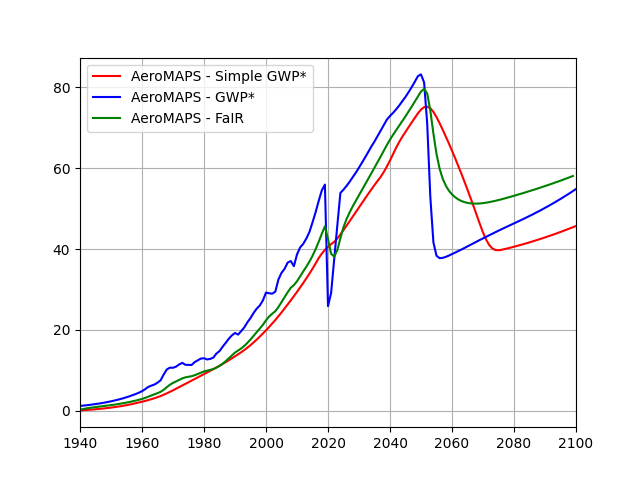

In [18]:
data_years_total = list(range(1940, 2101))

fig, ax = plt.subplots()
ax.plot(
    data_years_total,
    1000 * data_temperature_aeromaps_simple_gwpstar,
    color="red",
    label="AeroMAPS - Simple GWP*",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000 * data_temperature_aeromaps_gwpstar,
    color="blue",
    label="AeroMAPS - GWP*",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000 * data_temperature_aeromaps_fair,
    color="green",
    label="AeroMAPS - FaIR",
    linestyle="-",
)

ax.grid()
plt.xlim(1940, 2100)
plt.legend()
plt.show()